<p><font size="6"><b>08 - Pandas: Tidy data and reshaping</b></font></p>


> *© 2025, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tidy data

In a [tidy dataset](https://vita.had.co.nz/papers/tidy-data.pdf) (also sometimes called 'long-form' data or 'denormalized' data) each observation is stored in its own row and each column contains a single variable:

![](../img/tidy_data_scheme.png)

Consider the following example with measurements in different Waste Water Treatment Plants (WWTP):

In [2]:
data = pd.DataFrame({
   'WWTP': ['Destelbergen', 'Landegem', 'Dendermonde', 'Eeklo'],
   'Treatment A': [8.0, 7.5, 8.3, 6.5],
   'Treatment B': [6.3, 5.2, 6.2, 7.2]
})
data

,WWTP,Treatment A,Treatment B
0,Destelbergen,8.0,6.3
1,Landegem,7.5,5.2
2,Dendermonde,8.3,6.2
3,Eeklo,6.5,7.2


This data representation is not "tidy":

- Each row contains two observations of pH (each from a different treatment)
- 'Treatment' (A or B) is a variable not in its own column, but used as column headers

A "tidy" version would rather look like:

<table style="margin-left:0px;">
<thead>
<tr>
<th align="right"></th>
<th align="left">WWTP</th>
<th align="left">Treatment</th>
<th align="right">pH</th>
</tr>
</thead>
<tbody><tr>
<td align="right">0</td>
<td align="left">Destelbergen</td>
<td align="left">A</td>
<td align="right">8</td>
</tr>
<tr>
<td align="right">1</td>
<td align="left">Landegem</td>
<td align="left">A</td>
<td align="right">7.5</td>
</tr>
<tr>
<td align="right">2</td>
<td align="left">Dendermonde</td>
<td align="left">A</td>
<td align="right">8.3</td>
</tr>
<tr>
<td align="right">3</td>
<td align="left">Eeklo</td>
<td align="left">A</td>
<td align="right">6.5</td>
</tr>
<tr>
<td align="right">4</td>
<td align="left">Destelbergen</td>
<td align="left">B</td>
<td align="right">6.3</td>
</tr>
<tr>
<td align="right">5</td>
<td align="left">Landegem</td>
<td align="left">B</td>
<td align="right">5.2</td>
</tr>
<tr>
<td align="right">6</td>
<td align="left">Dendermonde</td>
<td align="left">B</td>
<td align="right">6.2</td>
</tr>
<tr>
<td align="right">7</td>
<td align="left">Eeklo</td>
<td align="left">B</td>
<td align="right">7.2</td>
</tr>
</tbody></table>

* Where each row is now one observation, i.e. one measurement for a certain location and treatment
* Each variable is its own column

## Melt - from wide to long/tidy format

We can use `melt()` to make a dataframe longer, i.e. to make a *tidy* version of your data:

In [3]:
pd.melt(data)  #, id_vars=["WWTP"])

,variable,value
0,WWTP,Destelbergen
1,WWTP,Landegem
2,WWTP,Dendermonde
3,WWTP,Eeklo
4,Treatment A,8.0
5,Treatment A,7.5
6,Treatment A,8.3
7,Treatment A,6.5
8,Treatment B,6.3
9,Treatment B,5.2


In [4]:
data_long = pd.melt(data, id_vars=["WWTP"], 
                    value_name="pH", var_name="Treatment")
data_long

,WWTP,Treatment,pH
0,Destelbergen,Treatment A,8.0
1,Landegem,Treatment A,7.5
2,Dendermonde,Treatment A,8.3
3,Eeklo,Treatment A,6.5
4,Destelbergen,Treatment B,6.3
5,Landegem,Treatment B,5.2
6,Dendermonde,Treatment B,6.2
7,Eeklo,Treatment B,7.2


The usage of the tidy data representation has some important benefits when working with `groupby` or data visualization libraries such as Seaborn:

In [5]:
data_long.groupby("Treatment")["pH"].mean()  # switch to `WWTP`

Treatment
Treatment A    7.575
Treatment B    6.225
Name: pH, dtype: float64

Applying Seaborn on the (wide) original format of the datadoes not fit as there is no way to link the two treatment columns to a certain representation:

```python
sns.catplot(data=data, x="WWTP", y="...", hue="...", kind="bar")  # this doesn't work that easily
```

Whereas using the long format, the "treatment" column can be represented by color (hue), e.g.

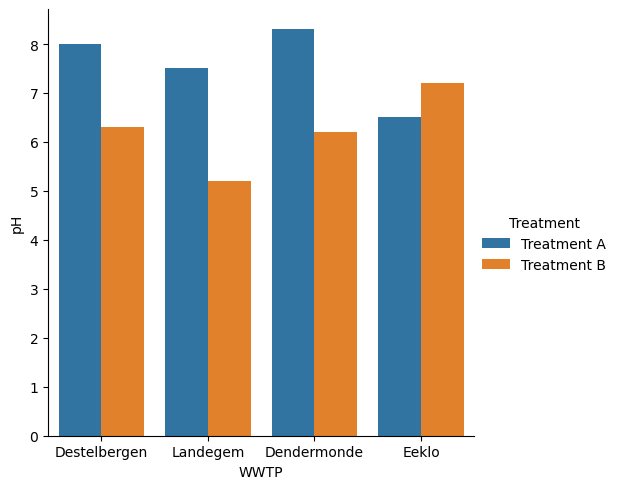

In [6]:
sns.catplot(data=data_long, x="WWTP", y="pH", 
            hue="Treatment", kind="bar")  # switch `WWTP` and `Treatment`

## Exercise with energy consumption data

To practice the "melt" operation, we are going to use a dataset from Fluvius (who operates and manages the gas and elektricity networks in Flanders) about the monthly consumption of elektricity and gas in 2021 (https://www.fluvius.be/sites/fluvius/files/2021-10/verbruiksgegevens-per-maand.xlsx).

This data is available as an Excel file.

<div class="alert alert-success">

**EXERCISE**:

* Read the "verbruiksgegevens-per-maand.xlsx" file (in the "data/" directory) into a DataFrame `df`.
* Drop the "Regio" column (this column has a constant value "Regio 1" and thus is not that interesting).

<details><summary>Hints</summary>

- Reading Excel files can be done with the `pd.read_excel()` function, passing the path to the file as first argument.
- To drop a column, use the `columns` keyword in the `drop()` method.

</details>
</div>

In [7]:
df = pd.read_excel("data/verbruiksgegevens-per-maand.xlsx")

In [8]:
df = df.drop(columns=["Regio"])
df

,Hoofdgemeente,Energie,SLP,202109,202108,202107,202106,202105,202104,202103,202102,202101,202012,202011,202010,202009
0,AALST,AARDGAS,S30,6.809886e+06,7.902540e+06,6.456549e+06,6.635968e+06,9.231682e+06,9.205371e+06,9.744194e+06,9.088327e+06,1.026002e+07,8.634328e+06,9.573311e+06,7.993325e+06,7.109659e+06
1,AALST,AARDGAS,S31,2.493345e+06,2.199204e+06,2.109207e+06,2.185184e+06,5.885841e+06,9.866553e+06,1.198416e+07,1.418893e+07,1.901789e+07,1.494960e+07,9.463571e+06,6.683950e+06,2.894385e+06
2,AALST,AARDGAS,S32,5.683474e+06,5.182524e+06,4.606805e+06,4.875152e+06,1.071529e+07,1.569022e+07,1.977173e+07,2.162223e+07,2.682299e+07,2.268056e+07,1.599560e+07,1.242209e+07,5.850695e+06
3,AALST,AARDGAS,S41,9.662256e+06,7.017670e+06,5.873547e+06,6.748631e+06,2.394703e+07,4.147907e+07,5.046576e+07,5.825720e+07,7.800084e+07,6.388330e+07,4.092629e+07,2.823175e+07,1.095325e+07
4,AALST,ELEKTRICITEIT,S10,1.450932e+07,1.359805e+07,1.299678e+07,1.480451e+07,1.304660e+07,1.336154e+07,1.441592e+07,1.363170e+07,1.480123e+07,1.327333e+07,1.337908e+07,1.473330e+07,1.397057e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,ZWIJNDRECHT,ELEKTRICITEIT,S10,4.855725e+06,4.346640e+06,3.841007e+06,4.744834e+06,4.163644e+06,4.990528e+06,5.074753e+06,4.804187e+06,4.910748e+06,4.865284e+06,4.778591e+06,4.904171e+06,4.814427e+06
2621,ZWIJNDRECHT,ELEKTRICITEIT,S11,4.670057e+05,4.465444e+05,4.464282e+05,4.618844e+05,4.602900e+05,4.778762e+05,5.628804e+05,5.471842e+05,6.294682e+05,6.049759e+05,5.447336e+05,5.259311e+05,4.947573e+05
2622,ZWIJNDRECHT,ELEKTRICITEIT,S12,2.410702e+04,2.318793e+04,2.833989e+04,5.382616e+04,5.285896e+04,5.541485e+04,1.118462e+05,1.223834e+05,1.446434e+05,1.432873e+05,1.337486e+05,1.555266e+05,1.601657e+05
2623,ZWIJNDRECHT,ELEKTRICITEIT,S21,1.441690e+06,1.435275e+06,1.419666e+06,1.408374e+06,1.482971e+06,1.481310e+06,1.638519e+06,1.532480e+06,1.737157e+06,1.695495e+06,1.548669e+06,1.473836e+06,1.353182e+06


<div class="alert alert-success">

**EXERCISE**:

The actual data (consumption numbers) is spread over multiple columns: one column per month. Make a tidy version of this dataset with a single "consumption" column, and an additional "time" column. 
    
Make sure to keep the "Hoofdgemeente", "Energie" and "SLP"  columns in the data set. The "SLP" column contains additional categories about the type of elektricity or gas consumption (eg household vs non-household consumption).

Use `pd.melt()` to create a long or tidy version of the dataset, and call the result `df_tidy`.

<details><summary>Hints</summary>

- If there are columns in the original dataset that you want to keep (with repeated values), pass those names to the `id_vars` keyword of `pd.melt()`.
- You can use the `var_name` and `value_name` keywords to directly specify the column names to use for the new variable and value columns.

</details>
</div>

In [9]:
df_tidy = pd.melt(df, id_vars=["Hoofdgemeente", "Energie", "SLP"], var_name="time", value_name="consumption")
df_tidy

,Hoofdgemeente,Energie,SLP,time,consumption
0,AALST,AARDGAS,S30,202109,6.809886e+06
1,AALST,AARDGAS,S31,202109,2.493345e+06
2,AALST,AARDGAS,S32,202109,5.683474e+06
3,AALST,AARDGAS,S41,202109,9.662256e+06
4,AALST,ELEKTRICITEIT,S10,202109,1.450932e+07
...,...,...,...,...,...
34120,ZWIJNDRECHT,ELEKTRICITEIT,S10,202009,4.814427e+06
34121,ZWIJNDRECHT,ELEKTRICITEIT,S11,202009,4.947573e+05
34122,ZWIJNDRECHT,ELEKTRICITEIT,S12,202009,1.601657e+05
34123,ZWIJNDRECHT,ELEKTRICITEIT,S21,202009,1.353182e+06


<div class="alert alert-success">

**EXERCISE**:

Convert the "time" column to a column with a datetime data type using `pd.to_datetime`.

<details><summary>Hints</summary>

* When using `pd.to_datetime`, remember to specify a `format`.

</details>
</div>

In [10]:
df_tidy["time"] = pd.to_datetime(df_tidy["time"], format="%Y%m")

<div class="alert alert-success">

**EXERCISE**:

* Calculate the total consumption of elektricity and gas over all municipalities ("Hoofdgemeente") for each month. Assign the result to a dataframe called `df_overall`.
* Using `df_overall`, make a line plot of the consumption of elektricity vs gas over time. 
  * Create a separate subplot for elektricity and for gas, putting them next to each other. 
  * Ensure that the y-limit starts at 0 for both subplots.

<details><summary>Hints</summary>

* If we want to sum the consumption over all municipalities that means we should _not_ include this variable in the groupby keys. On the other hand, we want to calculate the sum *for each* month ("time") and *for each* category of elektricity/gas ("Energie").
* Creating a line plot with seaborn can be done with `sns.relplot(..., kind="line")`.
* If you want to split the plot into multiple subplots based on a variable, check the `row` or `col` keyword.
* The `sns.relplot` returns a "facet grid" object, and you can change an element of each of the subplots of this object using the `set()` method of this object. To set the y-limits, you can use the `ylim` keyword.
    
</details>
</div>

In [11]:
df_overall = df_tidy.groupby(["time", "Energie"])[["consumption"]].sum() # or with .reset_index()
df_overall.head()

consumption
time       Energie                    
2020-09-01 AARDGAS        2.919983e+09
           ELEKTRICITEIT  2.483269e+09
2020-10-01 AARDGAS        5.068308e+09
           ELEKTRICITEIT  2.642614e+09
2020-11-01 AARDGAS        6.469256e+09

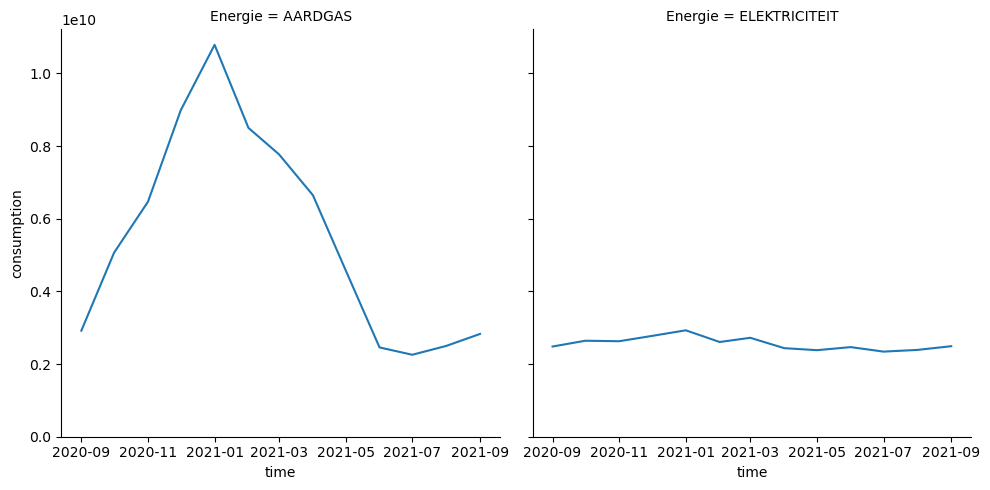

In [12]:
facet = sns.relplot(x="time", y="consumption", col="Energie",
                    data=df_overall, kind="line")
facet.set(ylim=(0, None))

# Pivoting data

## Cfr. excel

People who know Excel, probably know the **Pivot** functionality:

![](../img/pandas/pivot_excel.png)

The data of the table:

In [13]:
excelample = pd.DataFrame({'Month': ["January", "January", "January", "January", 
                                  "February", "February", "February", "February", 
                                  "March", "March", "March", "March"],
                   'Category': ["Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment"],
                   'Amount': [74., 235., 175., 100., 115., 240., 225., 125., 90., 260., 200., 120.]})

In [14]:
excelample

,Month,Category,Amount
0,January,Transportation,74.0
1,January,Grocery,235.0
2,January,Household,175.0
3,January,Entertainment,100.0
4,February,Transportation,115.0
5,February,Grocery,240.0
6,February,Household,225.0
7,February,Entertainment,125.0
8,March,Transportation,90.0
9,March,Grocery,260.0


In [15]:
excelample_pivot = excelample.pivot(index="Category", columns="Month", values="Amount")
excelample_pivot

Month,February,January,March
Category,,,
Entertainment,125.0,100.0,120.0
Grocery,240.0,235.0,260.0
Household,225.0,175.0,200.0
Transportation,115.0,74.0,90.0


Interested in *Grand totals*?

In [16]:
# sum columns
excelample_pivot.sum(axis=1)

Category
Entertainment     345.0
Grocery           735.0
Household         600.0
Transportation    279.0
dtype: float64

In [17]:
# sum rows
excelample_pivot.sum(axis=0)

Month
February    705.0
January     584.0
March       670.0
dtype: float64

## Pivot is just reordering your data:

Small subsample of the titanic dataset:

In [18]:
df = pd.DataFrame({'Fare': [7.25, 71.2833, 51.8625, 30.0708, 7.8542, 13.0],
                   'Pclass': [3, 1, 1, 2, 3, 2],
                   'Sex': ['male', 'female', 'male', 'female', 'female', 'male'],
                   'Survived': [0, 1, 0, 1, 0, 1]})

In [19]:
df

,Fare,Pclass,Sex,Survived
0,7.2500,3,male,0
1,71.2833,1,female,1
2,51.8625,1,male,0
3,30.0708,2,female,1
4,7.8542,3,female,0
5,13.0000,2,male,1


In [20]:
df.pivot(index='Pclass', columns='Sex', values='Fare')

Sex,female,male
Pclass,,
1,71.2833,51.8625
2,30.0708,13.0000
3,7.8542,7.2500


In [21]:
df.pivot(index='Pclass', columns='Sex', values='Survived')

Sex,female,male
Pclass,,
1,1,0
2,1,1
3,0,0


So far, so good...

Let's now use the full titanic dataset:

In [22]:
df = pd.read_csv("data/titanic.csv")

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


And try the same pivot (*no worries about the try-except, this is here just used to catch a loooong error*):

In [24]:
try:
    df.pivot(index='Sex', columns='Pclass', values='Fare')
except Exception as e:
    print("Exception!", e)

Exception! Index contains duplicate entries, cannot reshape


This does not work, because we would end up with multiple values for one cell of the resulting frame, as the error says: `duplicated` values for the columns in the selection. As an example, consider the following rows of our three columns of interest:

In [25]:
df.loc[[1, 3], ["Sex", 'Pclass', 'Fare']]

,Sex,Pclass,Fare
1,female,1,71.2833
3,female,1,53.1000


Since `pivot` is just restructering data, where would both values of `Fare` for the same combination of `Sex` and `Pclass` need to go?

Well, they need to be combined, according to an `aggregation` functionality, which is supported by the function`pivot_table`

<div class="alert alert-danger">

<b>NOTE</b>:

 <ul>
  <li><b>Pivot</b> is purely restructering: a single value for each index/column combination is required.</li>
</ul>

</div>

## Pivot tables - aggregating while pivoting

In [26]:
df = pd.read_csv("data/titanic.csv")

In [27]:
df.pivot_table(index='Sex', columns='Pclass', values='Fare')

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


<div class="alert alert-info">

<b>REMEMBER</b>:

* By default, `pivot_table` takes the **mean** of all values that would end up into one cell. However, you can also specify other aggregation functions using the `aggfunc` keyword.

</div>

In [28]:
df.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='max')

Pclass,1,2,3
Sex,,,
female,512.3292,65.0,69.55
male,512.3292,73.5,69.55


In [29]:
df.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li>There is a shortcut function for a <code>pivot_table</code> with a <code>aggfunc='count'</code> as aggregation: <code>crosstab</code></li>
</ul>
</div>

In [30]:
pd.crosstab(index=df['Sex'], columns=df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


## Exercises

<div class="alert alert-success">

__EXERCISE__

Make a pivot table with the survival rates for Pclass vs Sex.

</div>

In [31]:
df.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


Text(0, 0.5, 'Survival ratio')

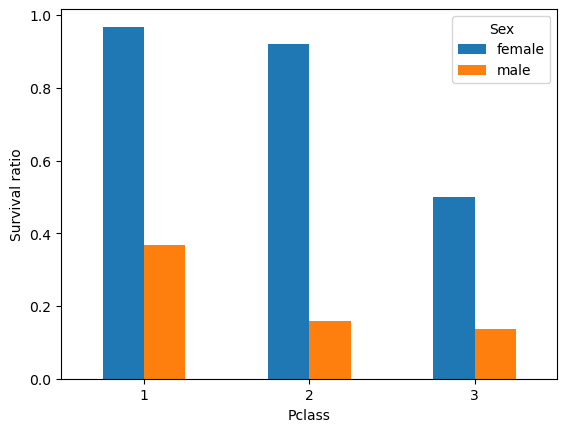

In [32]:
fig, ax1 = plt.subplots()
(df.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean')
   .plot.bar(rot=0, ax=ax1)
)
ax1.set_ylabel('Survival ratio')

<div class="alert alert-success">

__EXERCISE__

Make a table of the median Fare payed by aged/underaged vs Sex.

</div>

In [33]:
df['Underaged'] = df['Age'] <= 18

In [34]:
df.pivot_table(index='Underaged', columns='Sex', 
               values='Fare', aggfunc='median')

Sex,female,male
Underaged,,
False,24.1500,10.3354
True,20.2875,20.2500


<div class="alert alert-success">

__EXERCISE__

A pivot table aggregates values for each combination of the new row index and column values. That reminds of the "groupby" operation.
    
Can you mimick the pivot table of the first exercise (a pivot table with the survival rates for Pclass vs Sex) using `groupby()`?

</div>

In [35]:
df_survival = df.groupby(["Pclass", "Sex"])["Survived"].mean().reset_index()
df_survival

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [36]:
df_survival.pivot(index="Pclass", columns="Sex", values="Survived")

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


# Reshaping with `stack` and `unstack`

The docs say:

> Pivot a level of the (possibly hierarchical) column labels, returning a
DataFrame (or Series in the case of an object with a single level of
column labels) having a hierarchical index with a new inner-most level
of row labels.

Indeed... 
<img src="../img/pandas/schema-stack.svg" width=50%>

Before we speak about `hierarchical index`, first check it in practice on the following dummy example:

In [37]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 
                   'B':['a', 'b', 'a', 'b'], 
                   'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


To use `stack`/`unstack`, we need the values we want to shift from rows to columns or the other way around as the index:

In [38]:
df = df.set_index(['A', 'B']) # Indeed, you can combine two indices
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [39]:
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [40]:
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li><b>stack</b>: make your data <i>longer</i> and <i>smaller</i> </li>
  <li><b>unstack</b>: make your data <i>shorter</i> and <i>wider</i> </li>
</ul>
</div>

## Mimick pivot table

To better understand and reason about pivot tables, we can express this method as a combination of more basic steps. In short, the pivot is a convenient way of expressing the combination of a `groupby` and `stack/unstack`.

In [41]:
df = pd.read_csv("data/titanic.csv")

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exercises

In [43]:
df.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Get the same result as above based on a combination of `groupby` and `unstack`</li>
  <li>First use `groupby` to calculate the survival ratio for all groups`unstack`</li>
  <li>Then, use `unstack` to reshape the output of the groupby operation</li>
</ul>
</div>

In [44]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


# [OPTIONAL] Exercises: use the reshaping methods with the movie data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so credit to him!) and the datasets he prepared for that. You can download these data from here: [titles.csv](https://course-python-data.s3.eu-central-1.amazonaws.com/titles.csv) and [cast.csv](https://course-python-data.s3.eu-central-1.amazonaws.com/cast.csv) and put them in the `/notebooks/data` folder.

In [45]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [46]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Last Mimzy,2007
1,The Fighting Sheriff,1925
2,Giftes - nej tak!,1936
3,Sourdough,1981
4,A Time to Kill,1955


<div class="alert alert-success">

__EXERCISE__

Plot the number of actor roles each year and the number of actress roles each year over the whole period of available movie data.

</div>

<Axes: xlabel='year'>

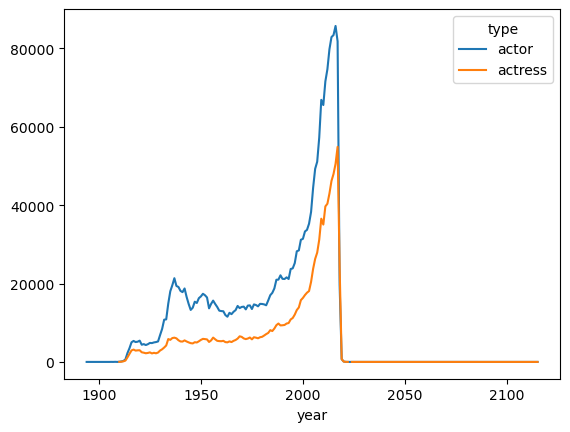

In [47]:
grouped = cast.groupby(['year', 'type']).size()
table = grouped.unstack('type')
table.plot()

<Axes: xlabel='year'>

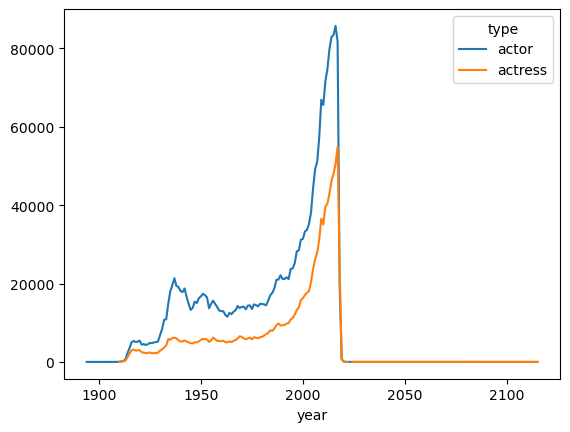

In [48]:
cast.pivot_table(index='year', columns='type', values="character", aggfunc='count').plot() 
# for the values column to use in the aggfunc, take a column with no NaN values in order to count effectively all values
# -> at this stage: aha-erlebnis about crosstab function(!)

<Axes: xlabel='year'>

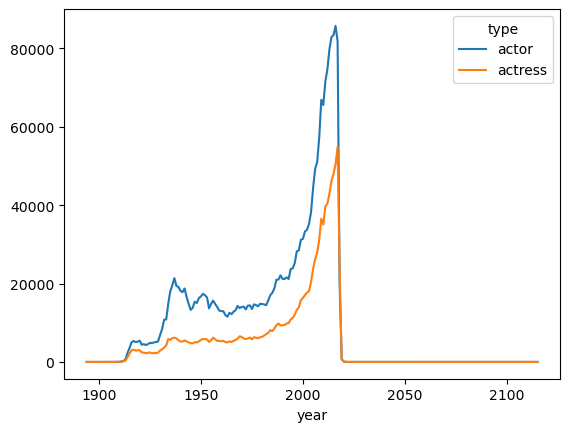

In [49]:
pd.crosstab(index=cast['year'], columns=cast['type']).plot()

<div class="alert alert-success">

__EXERCISE__

Plot the number of actor roles each year and the number of actress roles each year. Use kind='area' as plot type.

</div>

<Axes: xlabel='year'>

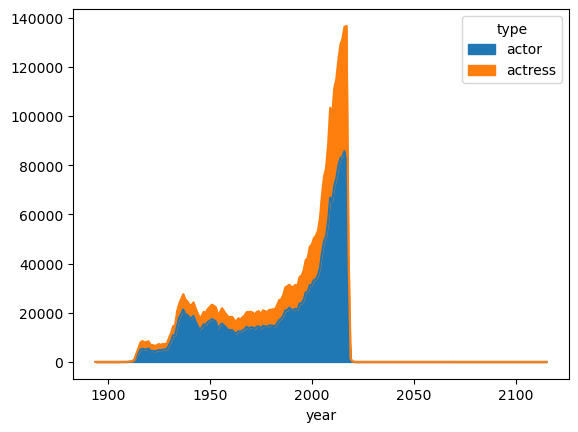

In [50]:
pd.crosstab(index=cast['year'], columns=cast['type']).plot.area()

<div class="alert alert-success">

__EXERCISE__

Plot the fraction of roles that have been 'actor' roles each year over the whole period of available movie data.

</div>

<Axes: xlabel='year'>

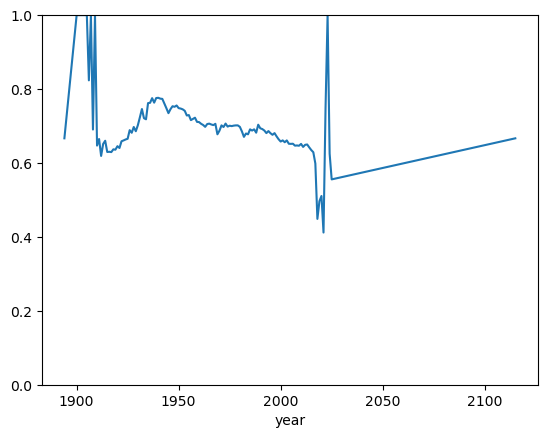

In [51]:
grouped = cast.groupby(['year', 'type']).size()
table = grouped.unstack('type').fillna(0)
(table['actor'] / (table['actor'] + table['actress'])).plot(ylim=[0, 1])

<div class="alert alert-success">

__EXERCISE__

Define a year as a "Superman year" when films of that year feature more Superman characters than Batman characters. How many years in film history have been Superman years?

</div>

In [52]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [53]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
11
